In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.read_csv('emnist-letters-train.csv',encoding='utf-8', header=None)
test = pd.read_csv('emnist-letters-test.csv',encoding='utf-8', header=None)

In [3]:
print(train.shape)
print(test.shape)

(88800, 785)
(14800, 785)


In [4]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


--- 
- train과 test 각각의 feature과 target을 나누기
- split labels and images from original dataframe.

In [6]:
train_data = train.iloc[:, 1:]
train_labels = train.iloc[:, 0]
test_data = test.iloc[:, 1:]
test_labels = test.iloc[:, 0]

- One hot encoding with get_dummies() and you can compare it with the original labels.
- get_dummies(): 숫자 특성은 그대로, 문자열 특성만 인코딩된다. (OneHotEncoder 사용가능)

In [7]:
train_labels = pd.get_dummies(train_labels)
test_labels = pd.get_dummies(test_labels)
train_labels.head()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


- Turn our Dataframes into numpy array and delete train and test to save up memory.

In [8]:
train_data = train_data.values
train_labels = train_labels.values
test_data = test_data.values
test_labels = test_labels.values
del train, test

---
- check train, test shape
---

In [29]:
train_data.shape

(88800, 784)

In [30]:
train_labels.shape

(88800, 26)

In [28]:
test_data.shape

(14800, 784)

In [27]:
test_labels.shape

(14800, 19)

- For some reason, sadly, the EMNIST dataset was rotated and flipped and we need fix that.

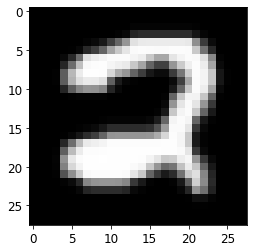

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_data[25].reshape([28, 28]), cmap='Greys_r')
plt.show()

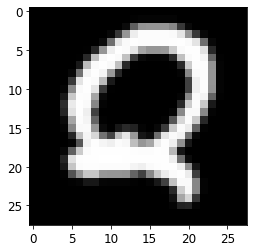

In [10]:
plt.imshow(train_data[35].reshape([28, 28]), cmap='Greys_r')
plt.show()

In [11]:
# 추후 필요할 경우 사용할 예정

"""
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image.reshape([28 * 28])
train_data = np.apply_along_axis(rotate, 1, train_data)/255
test_data = np.apply_along_axis(rotate, 1, test_data)/255
"""

'\ndef rotate(image):\n    image = image.reshape([28, 28])\n    image = np.fliplr(image)\n    image = np.rot90(image)\n    return image.reshape([28 * 28])\ntrain_data = np.apply_along_axis(rotate, 1, train_data)/255\ntest_data = np.apply_along_axis(rotate, 1, test_data)/255\n'

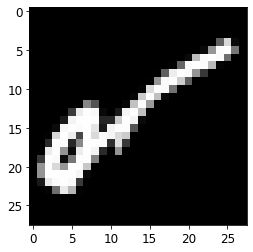

In [12]:
plt.imshow(train_data[30].reshape([28, 28]), cmap='Greys_r')
plt.show()

In [13]:
train_labels_a = (train_labels == 5)
test_labels_a = (test_labels == 5)

In [14]:
print(train_labels_a.shape)
print(test_labels_a.shape)

(88800, 26)
(14800, 19)


---
- Randomforest

In [15]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=800, n_jobs=-1, random_state=42)
rnd_clf.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [22]:
# Accuracy

from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(test_data)
accuracy_score(test_labels, y_pred)

ValueError: inconsistent shapes

In [24]:
y_pred.shape

(14800, 26)

In [25]:
test_labels.shape

(14800, 19)

In [17]:
from sklearn.model_selection import cross_val_score

cross_val_score(rnd_clf, train_data, train_labels_a, cv=3, scoring="accuracy")

array([1., 1., 1.])

In [ ]:
from sklearn.model_selection import cross_val_predict

train_labels_pred = cross_val_predict(rnd_clf, train_data, train_labels_a, cv=3)

In [ ]:
from sklearn.model_selection import confusion_matrix

confusion_matrix(train_labels_a, train_labels_pred)

In [ ]:
train_labels_perfect_predictions = train_labels_a

In [ ]:
confusion_matrix(train_labels_a, train_labels_perfect_predictions)

In [ ]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(train_labels_a, train_labels_pred))
print(recall_score(train_labels_a, train_labels_pred))

In [ ]:
from sklearn.metrics import f1_score

f1_score(train_labels, train_labels_pred)

In [ ]:
y_scores = cross_val_predict(rnd_clf, train_data, train_labels, cv=3,
                             method="decision_function")

In [ ]:
y_scores.shape

- precision recall curve

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(train_labels, y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-888000, 888000])
plt.show()

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### ROC curves

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

---
- Decision Tree

In [ ]:
from sklearn import tree

clf_dt = tree.DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train,y_train)

In [ ]:
y_pred_dt = clf_dt.predict(X_test)
accuracy_score(y_test, y_pred_dt)

---
- Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial').fit(X_train,y_train)
y_pred_lg = lg.predict(X_test)
accuracy_score(y_test, y_pred_lg)